In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import jax
import jax.numpy as jnp

In [2]:
d = 100
from jax import random
key = random.PRNGKey(1)
key

DeviceArray([0, 1], dtype=uint32)

In [3]:
A = jax.random.uniform(key, shape=(d,1), minval=0.0, maxval=1.0)

In [4]:
A

DeviceArray([[0.03350604],
             [0.4228704 ],
             [0.04554963],
             [0.08980203],
             [0.77278185],
             [0.7340044 ],
             [0.19629157],
             [0.9632051 ],
             [0.40125763],
             [0.6180724 ],
             [0.2933644 ],
             [0.6852062 ],
             [0.14773858],
             [0.3251965 ],
             [0.16776049],
             [0.76028013],
             [0.2798661 ],
             [0.02772212],
             [0.8074101 ],
             [0.19432187],
             [0.50142145],
             [0.16578972],
             [0.75377095],
             [0.40523124],
             [0.2838993 ],
             [0.7595489 ],
             [0.95365417],
             [0.8472152 ],
             [0.67348075],
             [0.9655738 ],
             [0.05605936],
             [0.45373845],
             [0.3185221 ],
             [0.8948369 ],
             [0.24599516],
             [0.93407154],
             [0.12670207],
 

In [5]:
I = jnp.identity(d)

In [8]:
K_0 = I*(jax.random.uniform(key))

In [9]:
np.linalg.eigvals(K_0)

array([0.11815023, 0.11815023, 0.11815023, 0.11815023, 0.11815023,
       0.11815023, 0.11815023, 0.11815023, 0.11815023, 0.11815023,
       0.11815023, 0.11815023, 0.11815023, 0.11815023, 0.11815023,
       0.11815023, 0.11815023, 0.11815023, 0.11815023, 0.11815023,
       0.11815023, 0.11815023, 0.11815023, 0.11815023, 0.11815023,
       0.11815023, 0.11815023, 0.11815023, 0.11815023, 0.11815023,
       0.11815023, 0.11815023, 0.11815023, 0.11815023, 0.11815023,
       0.11815023, 0.11815023, 0.11815023, 0.11815023, 0.11815023,
       0.11815023, 0.11815023, 0.11815023, 0.11815023, 0.11815023,
       0.11815023, 0.11815023, 0.11815023, 0.11815023, 0.11815023,
       0.11815023, 0.11815023, 0.11815023, 0.11815023, 0.11815023,
       0.11815023, 0.11815023, 0.11815023, 0.11815023, 0.11815023,
       0.11815023, 0.11815023, 0.11815023, 0.11815023, 0.11815023,
       0.11815023, 0.11815023, 0.11815023, 0.11815023, 0.11815023,
       0.11815023, 0.11815023, 0.11815023, 0.11815023, 0.11815

In [10]:
# Define epsilon.
epsilon = 0.0001

In [11]:
# Add small pertturbation. 
K = K_0 + epsilon*jnp.identity(d)


In [12]:
K

DeviceArray([[0.11825024, 0.        , 0.        , ..., 0.        ,
              0.        , 0.        ],
             [0.        , 0.11825024, 0.        , ..., 0.        ,
              0.        , 0.        ],
             [0.        , 0.        , 0.11825024, ..., 0.        ,
              0.        , 0.        ],
             ...,
             [0.        , 0.        , 0.        , ..., 0.11825024,
              0.        , 0.        ],
             [0.        , 0.        , 0.        , ..., 0.        ,
              0.11825024, 0.        ],
             [0.        , 0.        , 0.        , ..., 0.        ,
              0.        , 0.11825024]], dtype=float32)

In [13]:
L = jnp.linalg.cholesky(K)
L

DeviceArray([[0.34387532, 0.        , 0.        , ..., 0.        ,
              0.        , 0.        ],
             [0.        , 0.34387532, 0.        , ..., 0.        ,
              0.        , 0.        ],
             [0.        , 0.        , 0.34387532, ..., 0.        ,
              0.        , 0.        ],
             ...,
             [0.        , 0.        , 0.        , ..., 0.34387532,
              0.        , 0.        ],
             [0.        , 0.        , 0.        , ..., 0.        ,
              0.34387532, 0.        ],
             [0.        , 0.        , 0.        , ..., 0.        ,
              0.        , 0.34387532]], dtype=float32)

In [14]:
jnp.dot(L, np.transpose(L))

DeviceArray([[0.11825024, 0.        , 0.        , ..., 0.        ,
              0.        , 0.        ],
             [0.        , 0.11825024, 0.        , ..., 0.        ,
              0.        , 0.        ],
             [0.        , 0.        , 0.11825024, ..., 0.        ,
              0.        , 0.        ],
             ...,
             [0.        , 0.        , 0.        , ..., 0.11825024,
              0.        , 0.        ],
             [0.        , 0.        , 0.        , ..., 0.        ,
              0.11825024, 0.        ],
             [0.        , 0.        , 0.        , ..., 0.        ,
              0.        , 0.11825024]], dtype=float32)

In [19]:
n = 1000
u = np.random.normal(loc=0, scale=1, size=d*n).reshape(d, n)


In [20]:
u.shape

(100, 1000)

In [21]:
x = A + jnp.dot(L, u)

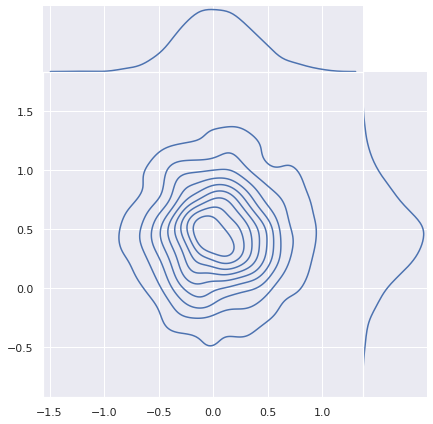

In [22]:
sns.jointplot(x=x[0], y=x[1], kind="kde", space=0);